## importing library ##


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Taking Care of Missing Values ##


In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## taking Care of Duplicate Values ##

In [ ]:
data_dup = data.duplicated().any()


In [ ]:
data_dup

True

In [ ]:
data = data.drop_duplicates()

In [ ]:
data_dup = data.duplicated().any()
data_dup

False

## data processsing ##

In [ ]:
cate_val = []
cont_val = []
for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [ ]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [ ]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

## encoding ##

In [ ]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [ ]:
data['cp'].unique()


array([3, 2, 1, 0])

In [ ]:
cate_val.remove('sex')
cate_val.remove('target')
data = pd.get_dummies(data,columns = cate_val,drop_first=True)

In [ ]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,1,145,233,150,2.3,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,1,130,250,187,3.5,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,0,130,204,172,1.4,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,1,120,236,178,0.8,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,0,120,354,163,0.6,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [ ]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.949794,1,0.764066,-0.261285,0.018826,1.084022,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.928548,1,-0.091401,0.067741,1.636979,2.118926,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.485726,0,-0.091401,-0.822564,0.980971,0.307844,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.209608,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.285561,0,-0.661712,2.080602,0.587366,-0.382092,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


## Splitting The Dataset Into The Training Set And Test Set ##

In [ ]:
X = data.drop('target',axis=1)

In [ ]:
y = data['target']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=42)

In [ ]:
y_test

180    0
229    0
111    1
247    0
60     1
      ..
250    0
104    1
300    0
194    0
185    0
Name: target, Length: 61, dtype: int64

## 1.Logistic Regression ##

In [ ]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.949794,1,0.764066,-0.261285,0.018826,1.084022,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.928548,1,-0.091401,0.067741,1.636979,2.118926,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.485726,0,-0.091401,-0.822564,0.980971,0.307844,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.209608,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.285561,0,-0.661712,2.080602,0.587366,-0.382092,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred1 = log.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred1)

0.9016393442622951

## 2.svm ##

In [ ]:
from sklearn import svm


In [ ]:
svm = svm.SVC()

In [ ]:
svm.fit(X_train,y_train)

SVC()

In [ ]:
y_pred2 = svm.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred2)

0.8688524590163934

## 3. KNeighbors Classifier ##

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred3=knn.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred3)

0.8688524590163934

In [ ]:
score = []

for k in range(1,10):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

In [ ]:
score

[0.8360655737704918,
 0.8524590163934426,
 0.8524590163934426,
 0.8688524590163934,
 0.8688524590163934,
 0.8360655737704918,
 0.8524590163934426,
 0.8360655737704918,
 0.8524590163934426]

In [ ]:
import matplotlib.pyplot as plt

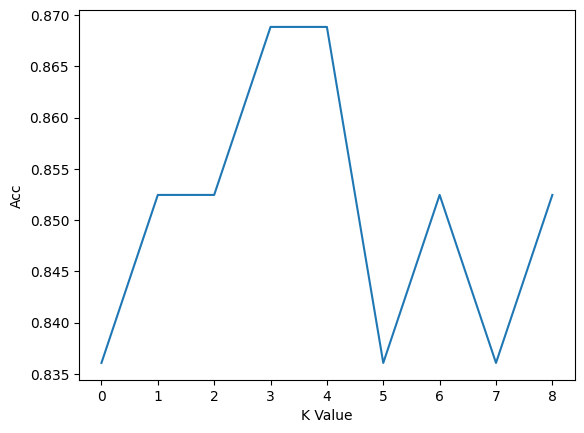

In [ ]:
plt.plot(score)
plt.xlabel("K Value")
plt.ylabel("Acc")
plt.show()

In [ ]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.8524590163934426

## 4.Decision Tree Classifier ##

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred4= dt.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred4)

0.7213114754098361

In [ ]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN ','DT'],
                          'ACC':[accuracy_score(y_test,y_pred1)*100,
                                accuracy_score(y_test,y_pred2)*100,
                                accuracy_score(y_test,y_pred3)*100,
                                accuracy_score(y_test,y_pred4)*100,
                                ]})

In [ ]:
final_data

,Models,ACC
0,LR,90.163934
1,SVM,86.885246
2,KNN,86.885246
3,DT,72.131148


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


<Axes: xlabel='Models', ylabel='ACC'>

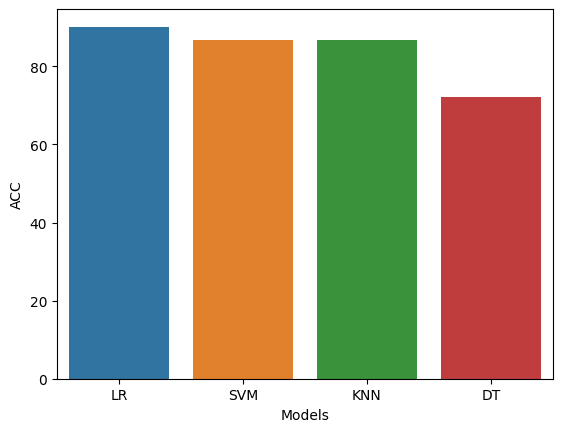

In [ ]:
sns.barplot(x='Models', y='ACC', data=final_data)